In [1]:
import numpy as np
import glob
import os
from matplotlib import pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

def showVoxel(voxel):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.voxels(voxel,edgecolors='k',linewidth=0.5)
    ax.set(xlabel='X', ylabel='Y', zlabel='Z')
    ax.set_xlim([0,max(voxel.shape)])
    ax.set_ylim([0,max(voxel.shape)])
    ax.set_zlim([0,max(voxel.shape)])
    plt.show()

In [3]:
root_dir = '/Users/zhangzeren/Downloads/dataset/abc'

with open(os.path.join(root_dir, 'train.txt'), 'r') as f:
    train_lst = f.readlines()
    
with open(os.path.join(root_dir, 'val.txt'), 'r') as f:
    val_lst = f.readlines()

train_lst = [item.strip('\n') for item in train_lst]
val_lst = [item.strip('\n') for item in val_lst]
all_lst = train_lst + val_lst

# Show Origin Converted Voxel

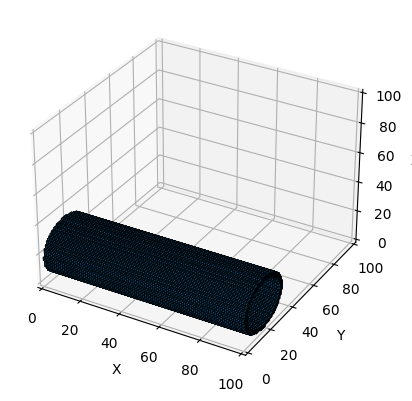

In [4]:
idx = 0
voxel = np.load(os.path.join(root_dir, all_lst[idx]))
showVoxel(voxel)


# Show Mix Up Voxel

In [5]:
from monai.transforms import (
    Compose,
    RandSpatialCrop,
    SpatialPad
)
import torch

/Users/zhangzeren/opt/anaconda3/envs/mae-3d/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

convert_size = [96, 96, 96]
transform = Compose([RandSpatialCrop(roi_size=convert_size, random_size=False),
                    SpatialPad(spatial_size=convert_size,method="symmetric")])

idx_1 = 0
idx_2 = 1
voxel_a = np.load(os.path.join(root_dir, all_lst[idx_1]))
voxel_b = np.load(os.path.join(root_dir, all_lst[idx_2]))

voxel_a = torch.from_numpy(voxel_a).float().unsqueeze(0)
voxel_b = torch.from_numpy(voxel_b).float().unsqueeze(0)
voxel_a = transform(voxel_a).as_tensor()
voxel_b = transform(voxel_b).as_tensor()
mix_voxel = voxel_a + voxel_b
mix_voxel[mix_voxel==2.] = 1.
mix_voxel = mix_voxel.squeeze(0)
mix_voxel = mix_voxel.numpy().astype(np.uint8)

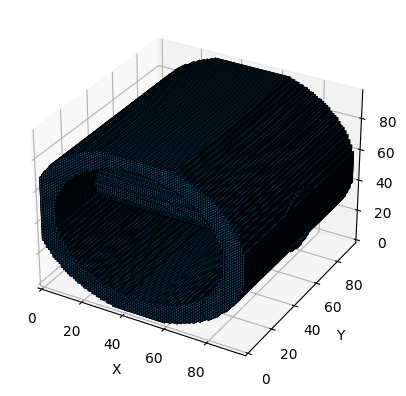

In [7]:
showVoxel(mix_voxel)